MSC 11-2022

# Fourier Transform

- [**Imports**](#Imports)
- [**Introduction**](#Introduction)
- [**Mathematics**](#Mathematics)
    - [**Fourier Transform**](#Fourier-Transform)
    - [**Discrete Fourier Transform**](#Discrete-Fourier-Transform)
    - [**Windowing and the Periodogram**](#Windowing-and-the-Periodogram)
- [**References**](#References)

## Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from openseize.core import numerical

## Introduction

The Fourier integral transform and its discrete counterpart play a pivotal role in the analysis of EEG signals. This transform maps a function that lives in a space whose domain is time to a new function that lives in a space whose domain is frequencies. This is accomplished by representing the time-domain function as a superposition or sum of many sines and cosines, formally called an orthonormal basis. Each of these sines and cosines has an amplitude. The square of this amplitude conveys how much power that particular sine/cosine wave is needed to represent the time-domain function. This powerful decomposition allows researchers to identify the strength (power) of periodic components in their EEG signal. This tutorial lightly covers the mathematics of the Fourier Transform and its application to data.

## Mathematics

### Fourier Transform

The <b>Fourier Transform</b> of a continuous signal $x(t)$ is defined as:
<br>
<br>
<p style="text-align: center;">
    $
    X^F(\omega) = \{\mathcal{F}\}x(\omega) = \int \limits_{-\infty}^{\infty} x(t)e^{-i\omega t}dt \quad (1)
    $ 
</p>
<br>
<br>
Here we are thinking of $x(t)$ as a function that lives in the time domain space and $X^F(\omega)$ as a function that lives in the frequency domain space. Recalling that $e^{-i\omega t} = \cos(\omega t) - i \sin(\omega t)$ (Euler's formula), we are <b>projecting</b> $x(t)$ onto a infinite sequence of sines and cosines in order to carry $x(t)$ from the time domain space to the frequency domain space. Here we define 
$\omega$ as the angular frequency (radians/sec) and then $f = \frac{\omega}{2 \pi}$ is in Hertz. 

### Discrete Fourier Transform

For discrete signals $x[n]$ there is a complementary <b>Discrete Fourier Transform</b> defined as:
<br>
<br>
<p style="text-align: center;">
    $
    X^F(\theta) = \{\mathcal{F}\}x(\theta) = \sum \limits_{n=-\infty}^{\infty} x(n)e^{-i\theta n} \quad (2)
    $ 
</p>
<br>
<br>
Here $\theta$ is a continuous variable that runs from 0 to $2 \pi$. Its units are radians per sample.
<br>
<br>
Notice that $X^F(\theta)$ is still a function defined over all $\theta \in [0, 2\pi]$. On a computer, we can't hold an infinite number of frequencies, so we will need to <b>Sample</b> the Discrete Fourier Transform (DFT). That is, we will sample $\theta$ at N equally spaced points in [0, 2$\pi$].
<br>
<br>
<p style="text-align: center;">
    $
        \theta[k] = \frac{2\pi k}{N} \quad 0 \leq k \leq N-1 \quad (3)
    $ 
</p>
<br>
<br>
Additionally, we note that EEG signals are finite duration (they don't go from $-\infty$ to $\infty$ like Eqn. 2). EEGs are defined from n=0 to n=N-1 where N is the number of samples taken in Eqn. 3, so we will we define the DFT to be zero everywhere except $n \in [0, N-1]$. To avoid confusion this tutorial will rename N to NFFT to make explicit that we are sampling the DFT at N=NFFT points.
<br>
<br>
Sampling the function $X^F(\theta)$ in Eqn. 2 gives us the <b>Sampled Discrete Time Fourier Transform</b> $X^d(k)$: 
<br>
<br>
<p style="text-align: center;">
    $
    X^d(k) = \sum \limits_{n=0}^{N-1} x(n)e^{\frac{-i 2 \pi k n}{N}} \quad 
    0 \leq k \leq N-1 \quad (4)
    $ 
</p>
<br>
<br>
The sampling applied the DFT determines the <b>Resolution $\Delta f$</b> of the frequencies in the Fourier domain. Specifically, 
<br>
<br>
<p style="text-align: center;">
    $
    \Delta f = \frac{fs}{NFFT} \quad (5)
    $ 
</p>
<br>
<br>
Where fs is the sampling frequency in Hertz. Lets now take a little example to understand what exactly the DFT does to a discrete time signal. Below we make a 3 Hz signal that is contaminated by noise from a Gaussian distribution with standard deviation of 2. Our goal here is to understand the representation of this signal in the Fourier domain after carrying out the DFT.

#### Make a 3 Hz sine wave lasting for 4 seconds sampled at 300 Hz with Gaussian additive noise and plot.

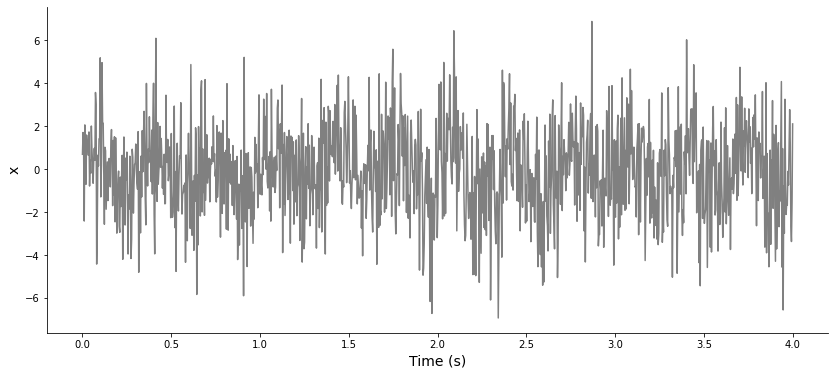

In [2]:
fig, ax = plt.subplots(figsize=(14,6))

duration, fs = 4, 300
time = np.linspace(0, duration, duration*fs)

# create a 3Hz signal
freq = 3
signal = np.sin(2*np.pi*time*freq)

# create noise with std=2
rng = np.random.default_rng(1)
noise = rng.normal(0, 2, size=len(time))

#compose signal and noise
x = signal + noise

# plot
ax.plot(time, x, color='gray', alpha=1)

ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('x', fontsize=14)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()


#### Compute the DFT of our noisy signal using a variety of NFFT frequency samplings & plot its magnitude.

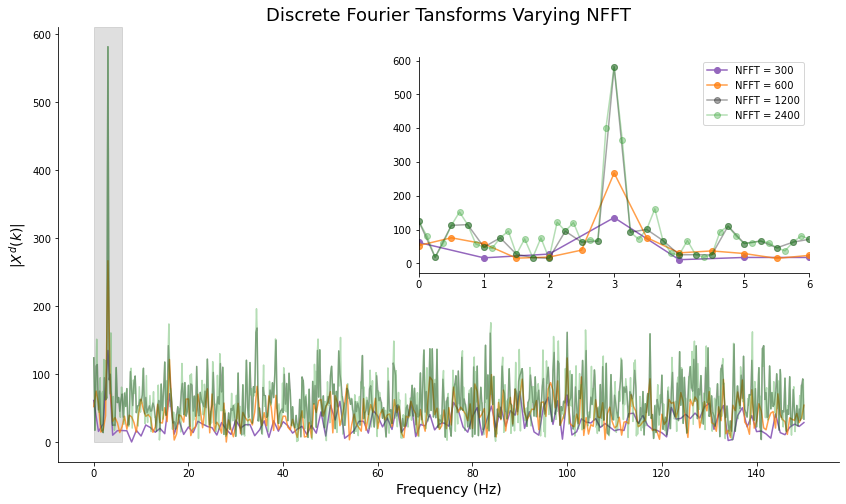

In [3]:
# Vary the nffts and plot each with different colors and lineprops
NFFTs = [300, 600, 1200, 2400]
colors = ['tab:purple', 'tab:orange', 'k', 'tab:green']
alphas = [1, .75, .35, .35]

# create a figure and inset
fig, ax = plt.subplots(figsize=(14,8))
axinset = inset_axes(ax, width="50%", height=3, loc=1, borderpad=3)
axarr = [ax, axinset]

# compute and plot each DFT
for nfft, color, alpha in zip(NFFTs, colors, alphas):
    
    # compute Fourier transform and Fourier frequencies
    x_f = np.abs(np.fft.rfft(x, n=nfft))
    x_freqs = np.fft.rfftfreq(nfft, d=1/fs)
    
    # plot DFTs making sure to label the nfft used
    axarr[0].plot(x_freqs, x_f, color, alpha=alpha, label='NFFT = {}'.format(nfft))
    axarr[1].plot(x_freqs, x_f, color, alpha=alpha, marker='o', 
                  label='NFFT = {}'.format(nfft))

#add rectangle patch and set inset zoom
rect = Rectangle((0,0), 6, axarr[0].get_ylim()[-1], color='gray', alpha=.25)
axarr[0].add_patch(rect)
axarr[1].set_xlim([0,6])

# configure plot
[ax.spines.top.set_visible(False) for ax in axarr]
[ax.spines.right.set_visible(False) for ax in axarr]
axarr[0].set_ylabel(r'$|X^d(k)|$', fontsize=14)
axarr[0].set_xlabel('Frequency (Hz)', fontsize=14)
axarr[1].legend()
axarr[0].set_title('Discrete Fourier Tansforms Varying NFFT', fontsize=18)
plt.show()

Lets now interpret what we are seeing in this plot.
1. We have plotted the DFT magnitude $|X^d(k)|$ because $X^d(k)$ is <b>imaginary</b>. 
<br>
<br>
2. We see a peak at 3 Hz since the signal contains a hidden 3 Hz sine wave.
<br>
<br>
3. The magnitude of this 3 Hz drops if the NFFT < number of samples in x (samples = 4 secs x 300 Hz = 1200).
<br>
<br>
4. The resolution $\Delta f$ follows $\Delta f = \frac{fs}{NFFT}$. That is, as we increase the NFFT, the resolution of the DFT gets sharper. In this case, fs=300 & the resolutions are 1 (purple), 0.5 (orange), 0.25 (gray) and 0.125 (green).
<br>
<br>
Lets visit point 3 more carefully. There are three possibilities for the number of sampling points NFFT.
<br>
<br>
- <b>NFFT < samples in x</b>
<br>
<br>
The purple and orange curves are when NFFT < samples. In this case, the number of samples above the NFFT are discarded. So for example in the purple curve (NFFT=300). Samples 300-1200 are dropped! This means that the amplitude at 3 Hz will drop. These DFTs are seeing less 3 Hz data.
<br>
<br>
- <b>NFFT = samples in x</b>
<br>
<br>
The black curve with NFFT = 1200 meets this condition. In this case the resolution is $\Delta f$ follows $\Delta f = \frac{fs}{NFFT} = 0.25 Hz$ and all of the signal x is used. Since we have 4 secs we get 1/4 Hz resolution.
<br>
<br>
- <b>NFFT > samples in x</b>
<br>
<br>
How can NFFT exceed the number of samples? When this occurs (green curve NFFT=2400), the signal is zero-padded. This allows for sampling the DFT (Eqn 2) at NFFT points > samples and this means frequencies will be <b>interpolated</b>. This interpolation does not increase information though. The interpolated frequencies are inferred not measured.

## Windowing and the Periodogram

If you have gone through the filtering demo, you will be familiar with the idea that taking a rectangular window of data in the sample or time domain creates sinc functions in the frequency domain. These sinc functions called Dirichlet kernels, have wide main-lobes and large side-lobes that smear the frequency resolution and mask weaker frequencies respectively. If you have forgotten a few of these points please refer back to the filtering demo. 
<br>
<br>
Taking the DFT of a signal in the time domain is equivalent to applying a rectangular window and then transforming the signal to the frequency domain using the DFT. This invokes all the frequeny problems associated with the Dirichlet kernel. To avoid these, it is common to apply a window to the data that weights samples near the center of our data, x[n], more heavily than the edges before taking the DFT of the signal. This windowing process followed by the DFT is called a <b>modified DFT</b>. Openseize provides a modified DFT function. This function is more difficult to access because for EEG data it should not be needed. It assumes that you have a signal that you want to take the DFT of using possibly all the sample points. Lets take a look at this function to understand the impact of windowing. 

In [4]:
help(numerical.modified_dft)

Help on function modified_dft in module openseize.core.numerical:

modified_dft(arr, fs, nfft, window, axis, detrend, scaling)
    Returns the windowed Discrete Fourier Transform of a real signal.
    
    Args:
        arr: ndarray
            An array of values to estimate the DFT along axis.
            This array is assumed to be real-valued (Hermetian symmetric)
        fs: int
            The sampling rate of the values in arr.
        nfft: int
            The number of frequencies between 0 and fs used to construct
            the DFT. If None, nfft will match the length of the arr. If 
            nfft is smaller than arr along axis, the array is cropped. If
            nfft is larger than arr along axis, the array is zero padded.
            The returned frequencies will be nfft//2 + 1 since this method
            returns only positive frequencies.
        window: str
            A scipy signal module window function. Please see references
            for all available windo

#### Compute a Hann window modified DFT & compare with a rectangular window DFT on our sample data x.

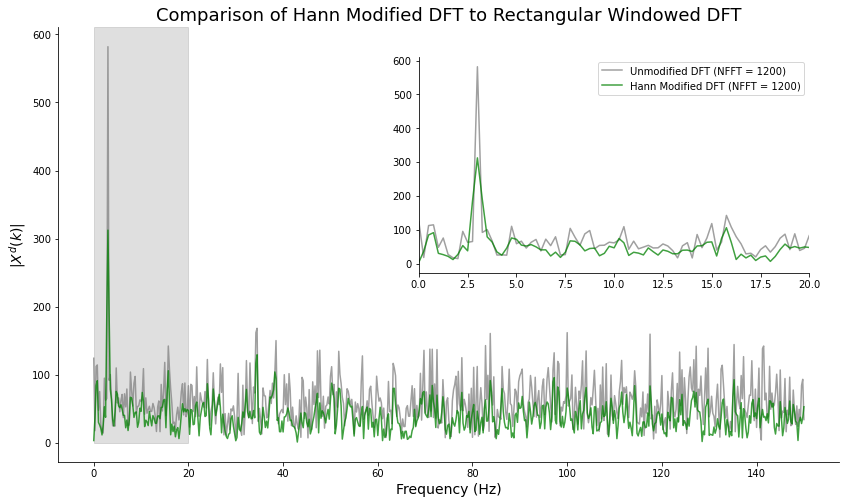

In [5]:
# Set the NFFT to the number of samples in x
NFFT=1200

# compute the Hann modified DFT using Openseize
mfreqs, mdft = numerical.modified_dft(x, fs=300, nfft=NFFT, window='hann', axis=-1, 
                                     detrend='constant', scaling='spectrum')

# openseize scaled the data by the window, to compare with a rectangular window,
# we will undo this scaling
win = sp.signal.get_window('hann', len(x))
norm = np.sqrt(np.sum(win)**2)

# compute the rectangular window DFT as before
x_f = np.abs(np.fft.rfft(x, n=NFFT))
x_freqs = np.fft.rfftfreq(NFFT, d=1/fs)

# create a figure and inset
fig, ax = plt.subplots(figsize=(14,8))
axinset = inset_axes(ax, width="50%", height=3, loc=1, borderpad=3)
axarr = [ax, axinset]

# plot DFTs making sure to label the nfft used
axarr[0].plot(x_freqs, np.abs(x_f), color='gray', alpha=0.75)
axarr[0].plot(mfreqs, np.abs(mdft) * norm, color='green', alpha=0.75)

axarr[1].plot(x_freqs, np.abs(x_f), color='gray', alpha=0.75, 
                  label='Unmodified DFT (NFFT = {})'.format(NFFT))
axarr[1].plot(mfreqs, np.abs(mdft) * norm, color='green', alpha=0.75, 
                  label='Hann Modified DFT (NFFT = {})'.format(NFFT))

#add rectangle patch and set inset zoom
rect = Rectangle((0,0), 20, axarr[0].get_ylim()[-1], color='gray', alpha=.25)
axarr[0].add_patch(rect)
axarr[1].set_xlim([0,20])

# configure plot
[ax.spines.top.set_visible(False) for ax in axarr]
[ax.spines.right.set_visible(False) for ax in axarr]
axarr[0].set_ylabel(r'$|X^d(k)|$', fontsize=14)
axarr[0].set_xlabel('Frequency (Hz)', fontsize=14)
axarr[1].legend()

axarr[0].set_title('Comparison of Hann Modified DFT to Rectangular Windowed DFT', 
                   fontsize=18)
plt.show()

A few important things to notice about how the window modifies a DFT.
- The amplitude of the 3 Hz has dropped by 50% due to the weaker weighting of the signal edges.
- The variance in the frequency response drops after modifying the DFT due to the smoothing of the discontinuities where the DFT meets the signal edges.

Lastly, <b>Openseize implements the modified DFT for you</b>.  In general users will not need to call the modified_dft function used here. In fact, the modified DFT implemented here does not work with producers, it requires all the data at once as an array. <b>Users will compute the spectral content of signals using Openseize's high-level spectra module</b>. The modified_dft function used here was to demonstrate DFT properties.

## References

<b>Introduction to Applied Statistical Signal Analysis : Guide to Biomedical and Electrical Engineering Applications.</b> by Shiavi R. 2007, 3rd ed.

<b>A Course in Digital Signal Processing. Chapters 2, 4, & 6.</b> by Boaz Porat, Wiley and Sons 1997.

<b>SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.</b>
 <br>
 Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020)

<b>Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020).</b>